In [1]:
#import requests
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime

from pandas import Series
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import statsmodels.api as sm

In [2]:
df = pd.read_csv('sss.csv')
df['Date']=pd.to_datetime(df['Date'])

In [3]:
df.columns

Index(['Date', 'Sightings'], dtype='object')

In [4]:
df


,Date,Sightings
0,2017-01-01,13
1,2017-02-01,17
2,2017-03-01,20
3,2017-04-01,26
4,2017-05-01,24
5,2017-06-01,20
6,2017-07-01,29
7,2017-08-01,17
8,2017-09-01,11
9,2017-10-01,13


In [5]:
### Rename the columns
new_df = df.reset_index().rename(columns={'Date':'date', 'Sightings' : 'Popu'})

### Remove the header row
new_df = new_df.iloc[1:len(new_df)]

new_df

,index,date,Popu
1,1,2017-02-01,17
2,2,2017-03-01,20
3,3,2017-04-01,26
4,4,2017-05-01,24
5,5,2017-06-01,20
6,6,2017-07-01,29
7,7,2017-08-01,17
8,8,2017-09-01,11
9,9,2017-10-01,13
10,10,2017-11-01,14


In [6]:
new_df['year']=new_df.date.dt.year
new_df['month']=new_df.date.dt.month
new_df['day']=new_df.date.dt.day

In [7]:
new_df

,index,date,Popu,year,month,day
1,1,2017-02-01,17,2017,2,1
2,2,2017-03-01,20,2017,3,1
3,3,2017-04-01,26,2017,4,1
4,4,2017-05-01,24,2017,5,1
5,5,2017-06-01,20,2017,6,1
6,6,2017-07-01,29,2017,7,1
7,7,2017-08-01,17,2017,8,1
8,8,2017-09-01,11,2017,9,1
9,9,2017-10-01,13,2017,10,1
10,10,2017-11-01,14,2017,11,1


In [8]:
new_df.index = new_df.date
new_df

,index,date,Popu,year,month,day
date,,,,,,
2017-02-01,1,2017-02-01,17,2017,2,1
2017-03-01,2,2017-03-01,20,2017,3,1
2017-04-01,3,2017-04-01,26,2017,4,1
2017-05-01,4,2017-05-01,24,2017,5,1
2017-06-01,5,2017-06-01,20,2017,6,1
2017-07-01,6,2017-07-01,29,2017,7,1
2017-08-01,7,2017-08-01,17,2017,8,1
2017-09-01,8,2017-09-01,11,2017,9,1
2017-10-01,9,2017-10-01,13,2017,10,1


<AxesSubplot:xlabel='month'>

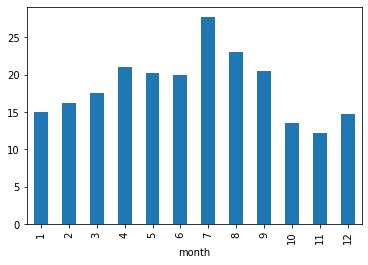

In [9]:
new_df.groupby('month').Popu.mean().plot.bar()

<AxesSubplot:xlabel='year'>

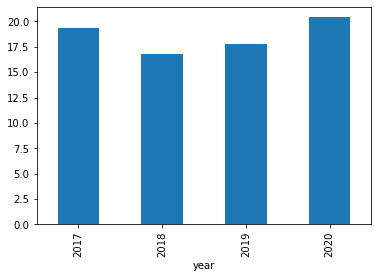

In [10]:
new_df.groupby('year').Popu.mean().plot.bar()

In [11]:
new_df

,index,date,Popu,year,month,day
date,,,,,,
2017-02-01,1,2017-02-01,17,2017,2,1
2017-03-01,2,2017-03-01,20,2017,3,1
2017-04-01,3,2017-04-01,26,2017,4,1
2017-05-01,4,2017-05-01,24,2017,5,1
2017-06-01,5,2017-06-01,20,2017,6,1
2017-07-01,6,2017-07-01,29,2017,7,1
2017-08-01,7,2017-08-01,17,2017,8,1
2017-09-01,8,2017-09-01,11,2017,9,1
2017-10-01,9,2017-10-01,13,2017,10,1


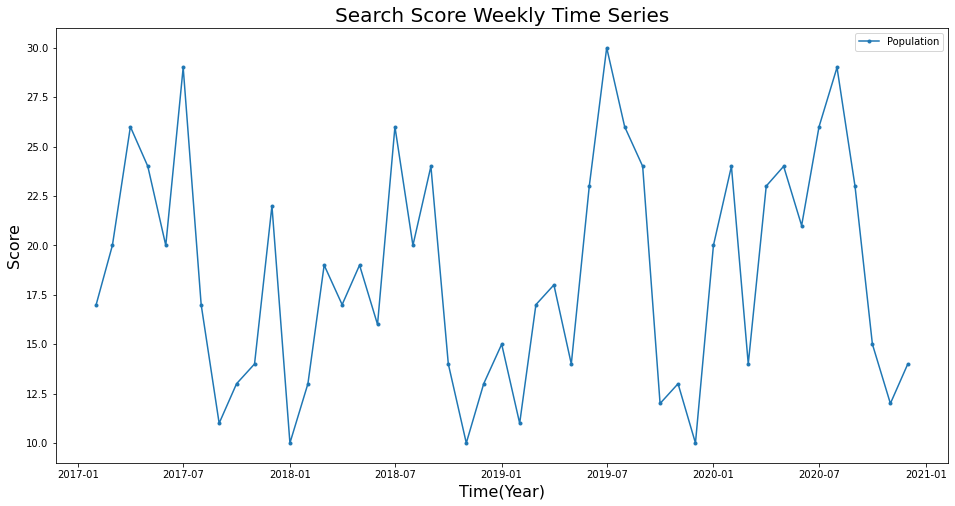

In [12]:
plt.figure(figsize=(16,8))

plt.plot(new_df['Popu'], ".-", label = 'Population')

plt.title('Search Score Weekly Time Series', fontsize=20)
plt.xlabel("Time(Year)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc = 'best')

In [13]:
monthly = new_df.resample('M').sum()
monthly

,index,Popu,year,month,day
date,,,,,
2017-02-28,1,17,2017,2,1
2017-03-31,2,20,2017,3,1
2017-04-30,3,26,2017,4,1
2017-05-31,4,24,2017,5,1
2017-06-30,5,20,2017,6,1
2017-07-31,6,29,2017,7,1
2017-08-31,7,17,2017,8,1
2017-09-30,8,11,2017,9,1
2017-10-31,9,13,2017,10,1


In [14]:
start_date = datetime(2017,2,28)
end_date = datetime(2020,12,31)

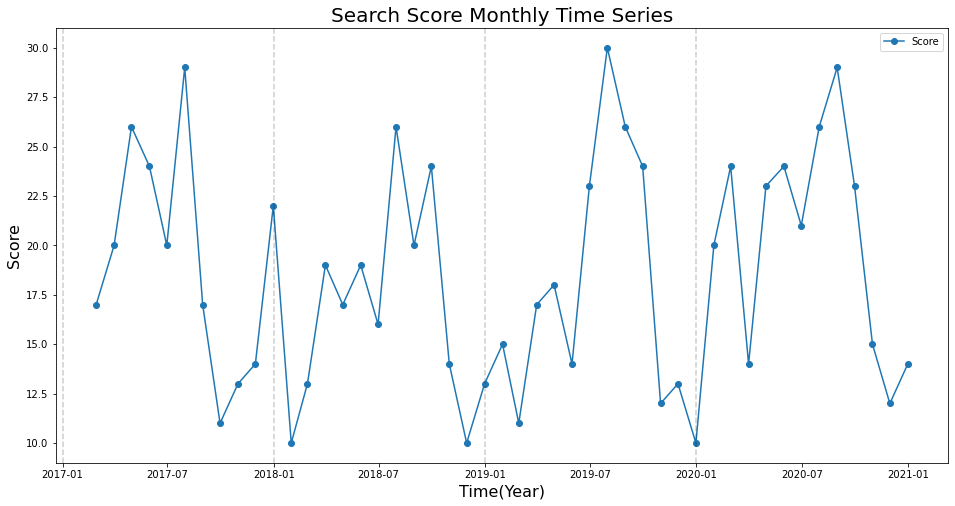

In [15]:
plt.figure(figsize=(16,8))

plt.plot(monthly['Popu'], "o-", label = 'Score')

plt.title('Search Score Monthly Time Series', fontsize=20)
plt.xlabel("Time(Year)", fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.legend(loc = 'best')

for year in range(start_date.year,end_date.year+1):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [16]:
start_date = datetime(2017,1,1)
end_date = datetime(2020,12,1)

lim_data = monthly[start_date:end_date]
len(lim_data)

46

In [17]:
lim_data

,index,Popu,year,month,day
date,,,,,
2017-02-28,1,17,2017,2,1
2017-03-31,2,20,2017,3,1
2017-04-30,3,26,2017,4,1
2017-05-31,4,24,2017,5,1
2017-06-30,5,20,2017,6,1
2017-07-31,6,29,2017,7,1
2017-08-31,7,17,2017,8,1
2017-09-30,8,11,2017,9,1
2017-10-31,9,13,2017,10,1


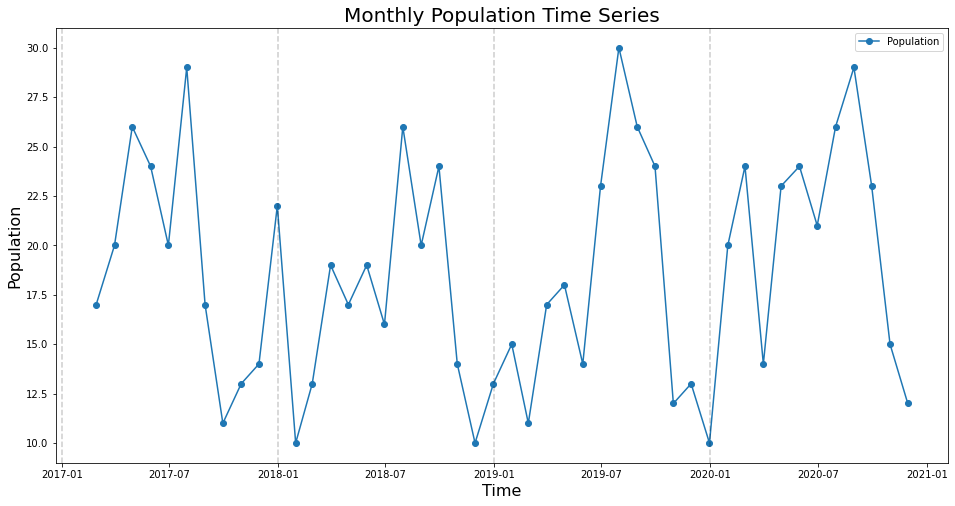

In [18]:
plt.figure(figsize=(16,8))

plt.plot(lim_data['Popu'], "o-", label = 'Population')

plt.title('Monthly Population Time Series', fontsize=20)
plt.xlabel("Time", fontsize=16)
plt.ylabel("Population", fontsize=16)
plt.legend(loc = 'best')

for year in range(start_date.year,end_date.year+1):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [19]:
# DF Test using statsmodels adfuller
from statsmodels.tsa.stattools import adfuller

def df_test(time_series):
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(time_series, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    
    print (dfoutput)

In [20]:
df_test(lim_data.Popu)

Results of Dickey-Fuller Test:
Test Statistic                 -4.128653
p-value                         0.000868
#Lags Used                      0.000000
Number of Observations Used    45.000000
Critical Value (1%)            -3.584829
Critical Value (5%)            -2.928299
Critical Value (10%)           -2.602344
dtype: float64


In [21]:
print(list(lim_data.Popu))

[17, 20, 26, 24, 20, 29, 17, 11, 13, 14, 22, 10, 13, 19, 17, 19, 16, 26, 20, 24, 14, 10, 13, 15, 11, 17, 18, 14, 23, 30, 26, 24, 12, 13, 10, 20, 24, 14, 23, 24, 21, 26, 29, 23, 15, 12]


In [22]:
first_diff = lim_data.Popu.diff()[1:]

print(list(first_diff))

[3.0, 6.0, -2.0, -4.0, 9.0, -12.0, -6.0, 2.0, 1.0, 8.0, -12.0, 3.0, 6.0, -2.0, 2.0, -3.0, 10.0, -6.0, 4.0, -10.0, -4.0, 3.0, 2.0, -4.0, 6.0, 1.0, -4.0, 9.0, 7.0, -4.0, -2.0, -12.0, 1.0, -3.0, 10.0, 4.0, -10.0, 9.0, 1.0, -3.0, 5.0, 3.0, -6.0, -8.0, -3.0]


No handles with labels found to put in legend.


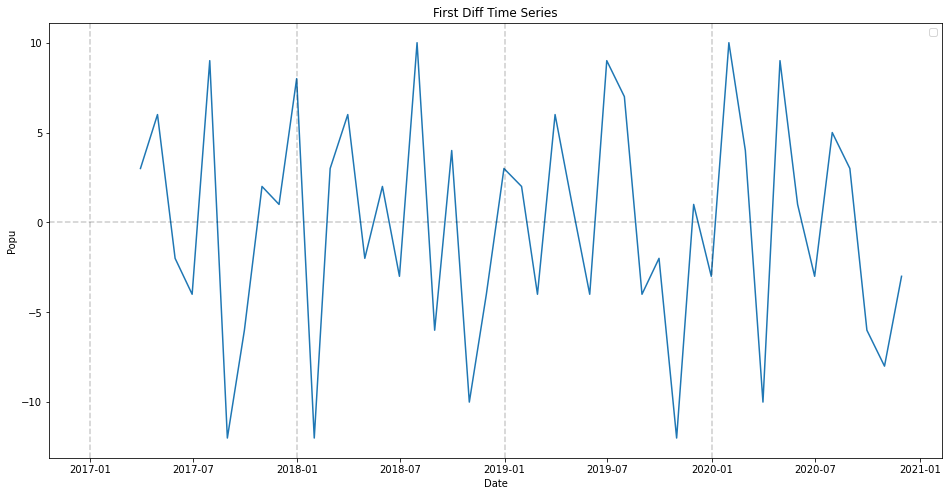

In [23]:
plt.figure(figsize=(16,8))

plt.plot(first_diff)

plt.title('First Diff Time Series')
plt.xlabel("Date")
plt.ylabel("Popu")
plt.legend(loc = 'best')

for year in range(start_date.year,end_date.year+1):
   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

In [24]:
df_test(first_diff)

Results of Dickey-Fuller Test:
Test Statistic                 -4.898406
p-value                         0.000035
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


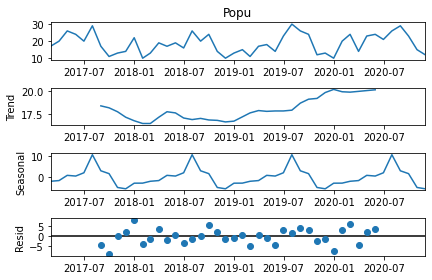

In [25]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(lim_data.Popu).plot()
plt.show()

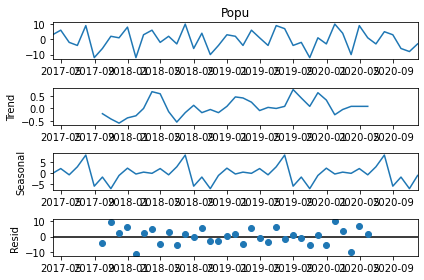

In [26]:
sm.tsa.seasonal_decompose(first_diff).plot()
plt.show()

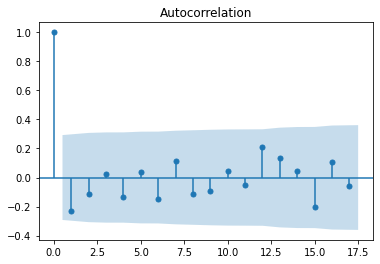

In [27]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_plot = plot_acf(first_diff)

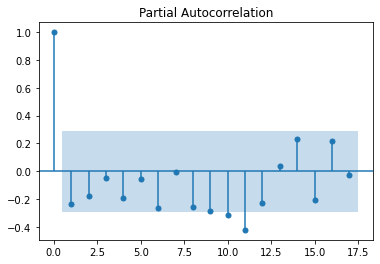

In [28]:
pacf_plot = plot_pacf(first_diff)

In [29]:
lim_data

,index,Popu,year,month,day
date,,,,,
2017-02-28,1,17,2017,2,1
2017-03-31,2,20,2017,3,1
2017-04-30,3,26,2017,4,1
2017-05-31,4,24,2017,5,1
2017-06-30,5,20,2017,6,1
2017-07-31,6,29,2017,7,1
2017-08-31,7,17,2017,8,1
2017-09-30,8,11,2017,9,1
2017-10-31,9,13,2017,10,1


In [30]:
from datetime import timedelta

train_end = datetime(2019,6,30)
test_end = datetime(2021,12,31)

train_data = lim_data[:train_end]
test_data = lim_data[train_end + timedelta(days=1):test_end]

In [31]:
train_data.tail(5)

,index,Popu,year,month,day
date,,,,,
2019-02-28,25,11,2019,2,1
2019-03-31,26,17,2019,3,1
2019-04-30,27,18,2019,4,1
2019-05-31,28,14,2019,5,1
2019-06-30,29,23,2019,6,1


In [32]:
test_data

,index,Popu,year,month,day
date,,,,,
2019-07-31,30,30,2019,7,1
2019-08-31,31,26,2019,8,1
2019-09-30,32,24,2019,9,1
2019-10-31,33,12,2019,10,1
2019-11-30,34,13,2019,11,1
2019-12-31,35,10,2019,12,1
2020-01-31,36,20,2020,1,1
2020-02-29,37,24,2020,2,1
2020-03-31,38,14,2020,3,1


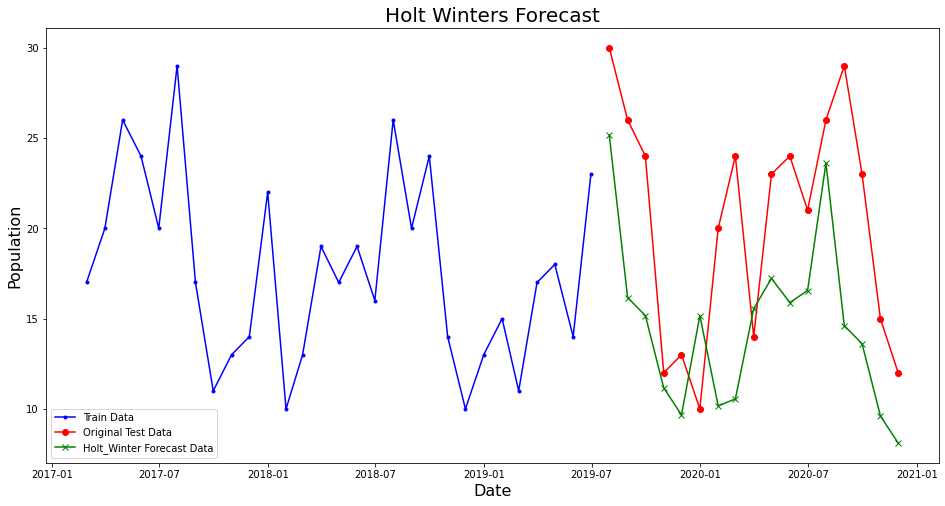

In [33]:
from statsmodels.tsa.api import ExponentialSmoothing


holt_winter = ExponentialSmoothing(np.asarray(train_data['Popu']), seasonal_periods=12, trend='add', seasonal='add')

hw_fit = holt_winter.fit()

hw_forecast = hw_fit.forecast(len(test_data))

plt.figure(figsize=(16,8))

plt.plot(train_data.index, train_data['Popu'], "b.-", label='Train Data')
plt.plot(test_data.index, test_data['Popu'], "ro-", label='Original Test Data')
plt.plot(test_data.index, hw_forecast, "gx-", label='Holt_Winter Forecast Data')
plt.ylabel('Population', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.legend(loc='best')
plt.title('Holt Winters Forecast', fontsize=20)
plt.show()

In [34]:
list(hw_forecast)

[25.166625449156015,
 16.16665619894549,
 15.166737442419658,
 11.166738679838735,
 9.666726003936075,
 15.166692695188022,
 10.166743915677223,
 10.555462136951602,
 15.555476627898276,
 17.22213990166611,
 15.888836986163039,
 16.555490424006404,
 23.611058366685498,
 14.61108911647497,
 13.611170359949137,
 9.611171597368214,
 8.111158921465554]

In [35]:
test_data['Popu']

date
2019-07-31    30
2019-08-31    26
2019-09-30    24
2019-10-31    12
2019-11-30    13
2019-12-31    10
2020-01-31    20
2020-02-29    24
2020-03-31    14
2020-04-30    23
2020-05-31    24
2020-06-30    21
2020-07-31    26
2020-08-31    29
2020-09-30    23
2020-10-31    15
2020-11-30    12
Freq: M, Name: Popu, dtype: int64

In [36]:
hw_residuals = test_data['Popu'] - hw_forecast

In [37]:
print('Mean Absolute Percent Error:', round(np.mean(abs(hw_residuals/test_data.Popu)),2))

Mean Absolute Percent Error: 0.32


In [38]:
print('Root Mean Squared Error:', np.sqrt(np.mean(hw_residuals**2)))

Root Mean Squared Error: 7.594267369341923


In [39]:
from pmdarima import auto_arima

Sarimax_model = auto_arima(train_data.Popu,
                       start_p=0,
                       start_q=0,
                       max_p=3,
                       max_q=3,
                       m=12,
                       test='adf',
                       seasonal=True,
                       d=1,
                       D=1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       stepwise=True)

Sarimax_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=114.711, Time=0.05 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=111.062, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=113.002, Time=0.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=112.711, Time=0.03 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=112.711, Time=0.05 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=111.014, Time=0.02 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=113.002, Time=0.08 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=115.002, Time=0.09 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=112.426, Time=0.03 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.10 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=107.719, Time=0.03 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   29
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 -51.860
Date:                             Tue, 23 Nov 2021   AIC                            107.719
Time:                                     18:47:21   BIC                            109.265
Sample:                                          0   HQIC                           107.799
                                              - 29                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9572      1.000     -0.957      0.338      -2.917       1.003
sigma2        33.3023     23.782      1.400      0.161     -13.309      79.914
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 1.46
Prob(Q):                              0.76   Prob(JB):                         0.48
Heteroskedasticity (H):               2.47   Skew:                             0.71
Prob(H) (two-sided):                  0.34   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

my_order = (0,1,1)

my_seasonal_order = (0, 1, 0, 12)

# define model
model = SARIMAX(train_data.Popu, order=my_order, seasonal_order=my_seasonal_order)

In [41]:
#fit the model
model_fit = model.fit()

In [42]:
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                Popu   No. Observations:                   29
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                 -51.860
Date:                             Tue, 23 Nov 2021   AIC                            107.719
Time:                                     18:47:21   BIC                            109.265
Sample:                                 02-28-2017   HQIC                           107.799
                                      - 06-30-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9572      1.000     -0.957      0.338      -2.917       1.003
sigma2        33.3023     2

In [43]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data.Popu))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data.Popu - predictions

In [44]:
residuals

date
2019-07-31     4.956465
2019-08-31     6.956465
2019-09-30     0.956465
2019-10-31    -1.043535
2019-11-30     3.956465
2019-12-31    -2.043535
2020-01-31     5.956465
2020-02-29    13.956465
2020-03-31    -2.043535
2020-04-30     5.956465
2020-05-31    10.956465
2020-06-30    -1.043535
2020-07-31     1.912929
2020-08-31    10.912929
2020-09-30     0.912929
2020-10-31     2.912929
2020-11-30     3.912929
Freq: M, dtype: float64

Text(0, 0.5, 'Error')

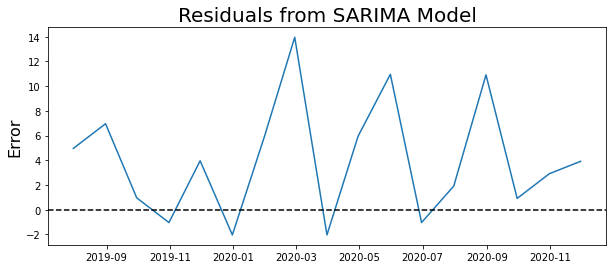

In [45]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [46]:
residuals.mean()

4.002483534567601

In [47]:
predictions

date
2019-07-31    25.043535
2019-08-31    19.043535
2019-09-30    23.043535
2019-10-31    13.043535
2019-11-30     9.043535
2019-12-31    12.043535
2020-01-31    14.043535
2020-02-29    10.043535
2020-03-31    16.043535
2020-04-30    17.043535
2020-05-31    13.043535
2020-06-30    22.043535
2020-07-31    24.087071
2020-08-31    18.087071
2020-09-30    22.087071
2020-10-31    12.087071
2020-11-30     8.087071
Freq: M, Name: predicted_mean, dtype: float64

Text(0.5, 0, 'Time')

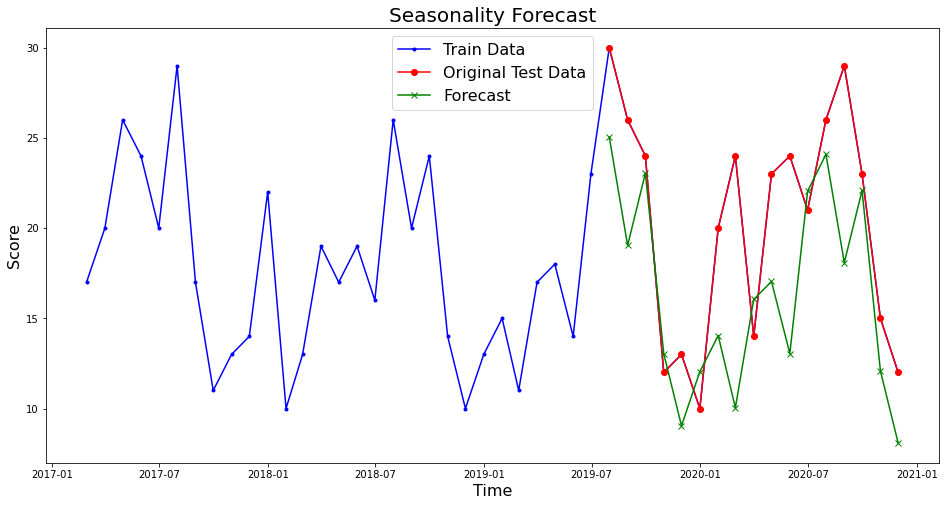

In [48]:
plt.figure(figsize=(16,8))

plt.plot(lim_data.Popu, "b.-")
plt.plot(test_data.Popu, "ro-")
plt.plot(predictions, "gx-")

plt.legend(('Train Data', 'Original Test Data', 'Forecast'), fontsize=16)

plt.title('Seasonality Forecast', fontsize=20)
plt.ylabel('Score', fontsize=16)
plt.xlabel('Time', fontsize=16)

#for year in range(start_date.year,end_date.year):
 #   plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [49]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data.Popu)),3))

Mean Absolute Percent Error: 0.228


In [50]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 6.103153811680563


In [51]:
test_data.Popu

date
2019-07-31    30
2019-08-31    26
2019-09-30    24
2019-10-31    12
2019-11-30    13
2019-12-31    10
2020-01-31    20
2020-02-29    24
2020-03-31    14
2020-04-30    23
2020-05-31    24
2020-06-30    21
2020-07-31    26
2020-08-31    29
2020-09-30    23
2020-10-31    15
2020-11-30    12
Freq: M, Name: Popu, dtype: int64

In [52]:
predictions

date
2019-07-31    25.043535
2019-08-31    19.043535
2019-09-30    23.043535
2019-10-31    13.043535
2019-11-30     9.043535
2019-12-31    12.043535
2020-01-31    14.043535
2020-02-29    10.043535
2020-03-31    16.043535
2020-04-30    17.043535
2020-05-31    13.043535
2020-06-30    22.043535
2020-07-31    24.087071
2020-08-31    18.087071
2020-09-30    22.087071
2020-10-31    12.087071
2020-11-30     8.087071
Freq: M, Name: predicted_mean, dtype: float64

In [53]:
print(test_data.index)
train_data.shape

DatetimeIndex(['2019-07-31', '2019-08-31', '2019-09-30', '2019-10-31',
               '2019-11-30', '2019-12-31', '2020-01-31', '2020-02-29',
               '2020-03-31', '2020-04-30', '2020-05-31', '2020-06-30',
               '2020-07-31', '2020-08-31', '2020-09-30', '2020-10-31',
               '2020-11-30'],
              dtype='datetime64[ns]', name='date', freq='M')


(29, 5)

In [54]:
rolling_predictions = []

for train_end in test_data.index:
    #print(train_end-timedelta(days=1))
    train_data1 = lim_data.Popu[:train_end-timedelta(days=1)]
    #print(len(train_data1))
    model = SARIMAX(train_data1, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions.append(pred[0])
    
rolling_predictions = pd.Series(rolling_predictions, index=test_data.index)
rolling_predictions

date
2019-07-31    25.043535
2019-08-31    20.251836
2019-09-30    26.092343
2019-10-31    15.342919
2019-11-30    10.526595
2019-12-31    13.966477
2020-01-31    15.235062
2020-02-29    11.940934
2020-03-31    20.499862
2020-04-30    19.842866
2020-05-31    16.404744
2020-06-30    26.976923
2020-07-31    32.688172
2020-08-31    27.657527
2020-09-30    25.825468
2020-10-31    13.464185
2020-11-30    14.644660
Freq: M, dtype: float64

In [55]:
rolling_residuals = test_data.Popu - rolling_predictions
rolling_residuals

date
2019-07-31     4.956465
2019-08-31     5.748164
2019-09-30    -2.092343
2019-10-31    -3.342919
2019-11-30     2.473405
2019-12-31    -3.966477
2020-01-31     4.764938
2020-02-29    12.059066
2020-03-31    -6.499862
2020-04-30     3.157134
2020-05-31     7.595256
2020-06-30    -5.976923
2020-07-31    -6.688172
2020-08-31     1.342473
2020-09-30    -2.825468
2020-10-31     1.535815
2020-11-30    -2.644660
Freq: M, dtype: float64

Text(0, 0.5, 'Error')

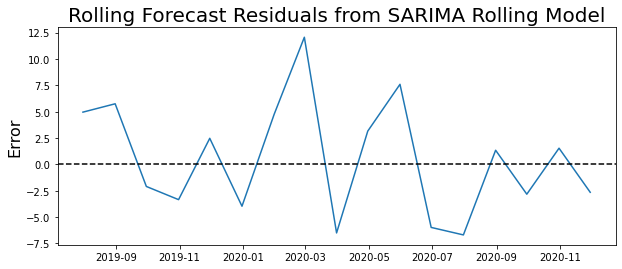

In [56]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Rolling Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [57]:
rolling_residuals.mean()

0.5644641539543948

Text(0.5, 0, 'Time')

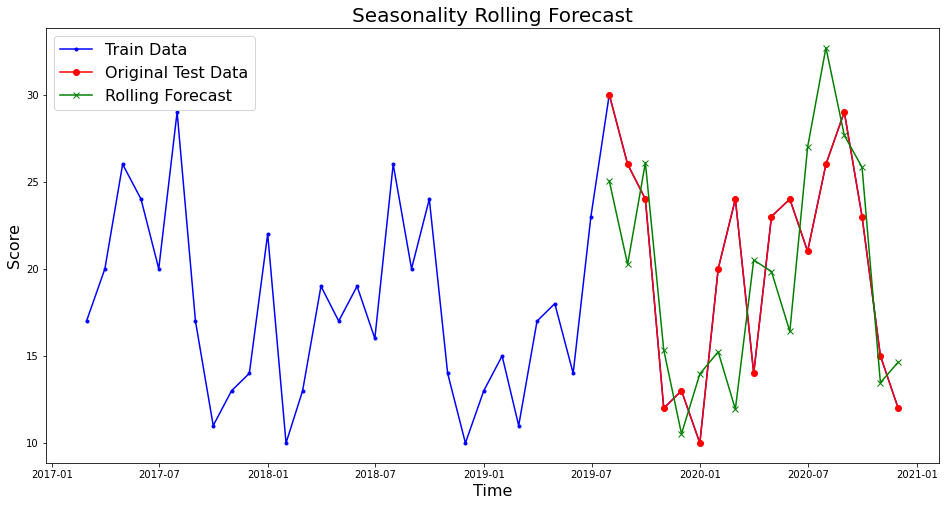

In [58]:
   
plt.figure(figsize=(16,8))

plt.plot(lim_data.Popu, "b.-")
plt.plot(test_data.Popu, "ro-")
plt.plot(rolling_predictions, "gx-")

plt.legend(('Train Data', 'Original Test Data', 'Rolling Forecast'), fontsize=16)

plt.title('Seasonality Rolling Forecast', fontsize=20)
plt.ylabel('Score', fontsize=16)
plt.xlabel('Time', fontsize=16)

In [59]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data.Popu)),2))

Mean Absolute Percent Error: 0.24


In [60]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 5.27276378800487
